 #                           BATCH NORMALIZATON ALGORITHM
                                (YIĞIN NORMALLEŞTİRME ALGORİTMASI)

Batch Normalization şu amaçlar için kullanılır:

1.Modelin eğitimini hızlandırmak.(Speeds up Training)
2.Modeli düzenleyerek Dropout ihtiyacını azaltmak.(Acts a Regularizer)

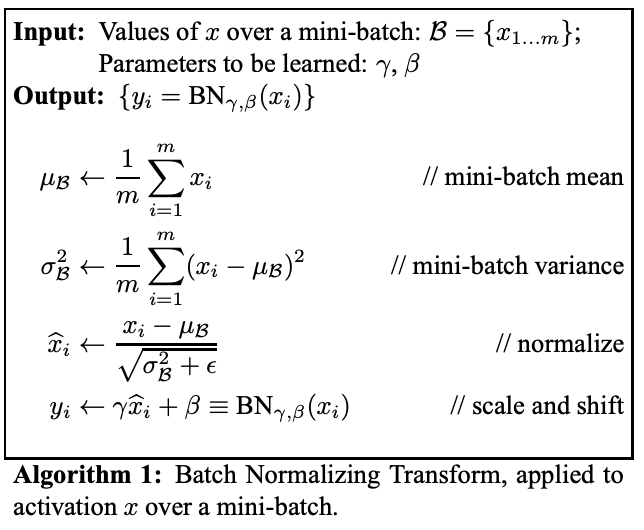

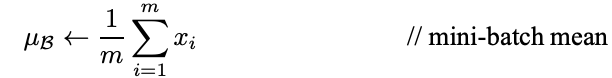

Bu ilk işlem bir mini parti içindeki girişlerin ortalamasını hesaplar. İşlemin sonucu, her bir girişin ortalamasını içeren bir vektördür.

' m ' minibatch'deki giriş sayısını ifade eder.

' µ ' ortalamayı ifade eder.

' B ', geçerli toplu işi ifade eden bir alt simge.

' xi ' girdinin değerini ifade eder.

Bir partinin ( 'B' ), ortalaması ( 'µ' ), partinin birkaç giriş örneğinin toplamı ve toplam giriş sayısına ( 'm' ) bölünmesiyle hesaplanır .

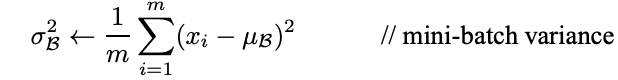

Yukarıdaki işlemde, giriş varyansı ( σ² ), girdinin standart sapmalarının karesi alınarak hesaplanmaktadır. Standart sapmaları hesaplamak için, her giriş örneğini ( Xi ) mevcut mini parti içinde alırız ve bir önceki işlemde hesaplanan mini partinin ortalamasını ( µB ) çıkarır ve sonucun karesini alırız.

Bu değer daha sonra varyans ( σ ) elde etmek için kare haline getirilir .

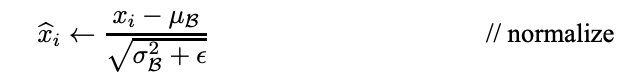

Şimdi sıfır merkezleme ve girişlerin normalleştirilmesi için gerekli tüm değerlere sahibiz . Yukarıdaki işlemde girdi verilerini bir standardizasyon sürecinden geçiriyoruz. Standardizasyon ve normalleştirme terimleri birbirinin yerine kullanılabilir. İki terim arasında ince bir fark vardır.

Yukarıdaki işlemde, partinin ortalaması her giriş anından çıkarılır. Ardından, sonucu, mevcut partinin standart sapma değeri ile yumuşatma terimi ( ε ) arasındaki karekök ekleme değerine böleriz .

Yumuşatma terimi ( ε ) bölünmeyi sıfır değerinde durdurarak işlem içinde sayısal kararlılık sağlar. Yumuşatma terimi genellikle 0.00005'tir.



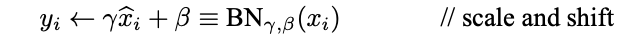


Son işlemde, giriş değerlerinin yeniden ölçeklenmesi ve dengelenmesi gerçekleşir. Bu işlemin çıktısı mevcut mini parti üzerindeki BN algoritmasının sonucudur.

Son işlemde, BN algoritmasının iki yeni bileşenini tanıdık. Bileşenler , önceki işlemlerden değerleri içeren vektörün ölçeklendirilmesi ( γ ) ve kaydırılması ( β ) için kullanılan parametre vektörleridir . Ölçekleme ve kaydırma için parametre vektörlerinin değerleri öğrenilebilir parametrelerdir. Eğitim sırasında BN, öğrenilebilir parametrelerin her bir mini partinin doğru normalleştirilmesini sağlayan en uygun değerler olmasını sağlar.

BN dönüşümü, derin sinir ağlarının performansını arttırmak için etkili bir yöntemdir.





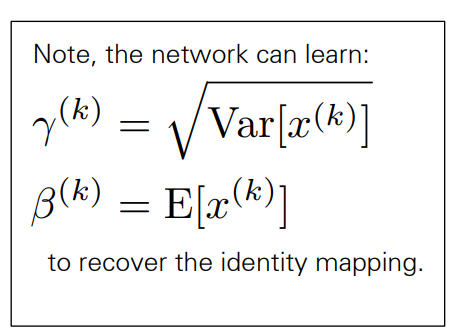

# Forward-Propagation(İleri Yayılım)

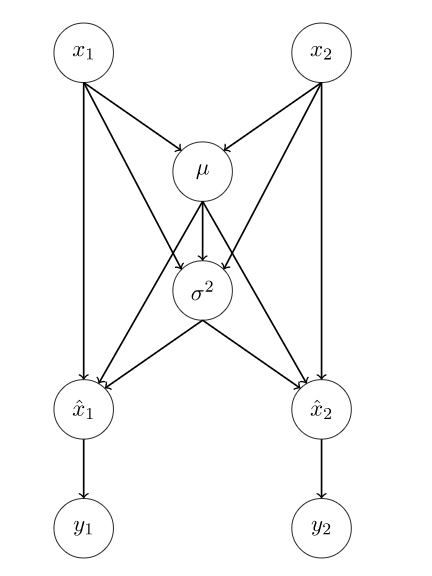

In [1]:
import numpy as np

print("*****Forward-Propagation*****\n")
x1 = 22
x2 = 34

mu = (x1+x2)/2
print("mini-batch mean:",mu)
sigma2 = (np.power(x1-mu,2) + np.power(x2-mu,2)) / 2  #varyans
print("\nmini-batch variance:", sigma2)

eps = 0.00005
xx1 = (x1-mu)/np.sqrt(sigma2 + eps)
xx2 = (x2-mu)/np.sqrt(sigma2 + eps)
print("\nNormalize edilmiş değerler")
print("\n\txx1:",xx1)
print("\n\txx2:",xx2)

normalize_values = [xx1, xx2]
print("\nGamma, Beta başlangıç değerleri")
gamma = np.sqrt(sigma2)
beta = mu

print("\n\tGamma:", gamma)
print("\n\tBeta:", beta)
                          
y1 = gamma*xx1 + beta
y2 = gamma*xx2 + beta
print("\nOutput değerleri")
print("\n\tOutput-y1:", y1)
print("\n\tOutput-y1:", y2)


*****Forward-Propagation*****

mini-batch mean: 28.0

mini-batch variance: 36.0

Normalize edilmiş değerler

	xx1: -0.9999993055562789

	xx2: 0.9999993055562789

Gamma, Beta başlangıç değerleri

	Gamma: 6.0

	Beta: 28.0

Output değerleri

	Output-y1: 22.000004166662325

	Output-y1: 33.99999583333767


# Back-Propagation(Geri Yayılım)

### Betaya göre türev

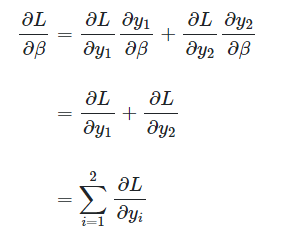

In [2]:
print("*****Back-Propagation*****\n")

dy1 = 1
dy2 = 1

print("\n\t#Loss'un y1'e göre türevi:", dy1)
print("\n\t#Loss'un y2'ye göre türevi:", dy2)

#Üst katmandan gelen türev * o katmandaki türev
#Loss'tan gelen türev * o y'ye göre türev
dbetax1 = 1  
dbetax2 = 1
dbeta = dy1 * dbetax1 + dy2* dbetax2

print("\n\t#Loss'un betaya göre türevi:", dbeta)

learningRate = 0.00001
updateBeta = beta - learningRate * dbeta
print("\n\tGüncellenmiş Beta Değeri:", updateBeta)

*****Back-Propagation*****


	#Loss'un y1'e göre türevi: 1

	#Loss'un y2'ye göre türevi: 1

	#Loss'un betaya göre türevi: 2

	Güncellenmiş Beta Değeri: 27.99998


### Gamaya göre türev

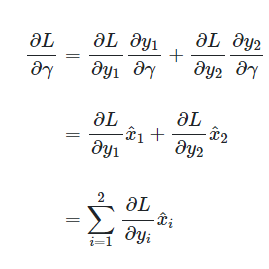

In [246]:
#Üst katmandan gelen türev * katmandaki türev
dgammax1 = x1 # 
dgammax2 = x2
dgamma = dy1 * dgammax1 + dy2* dgammax2

print("\n\t#Loss'un gama'ya göre türevi:", dgamma)

updateGamma = gamma - learningRate * dgamma
print("\n\tGüncellenmiş Gamma Değeri:", updateGamma)


	#Loss'un gama'ya göre türevi: 56

	Güncellenmiş Gamma Değeri: 5.99944


### xx1 ve xx2' ye göre türev

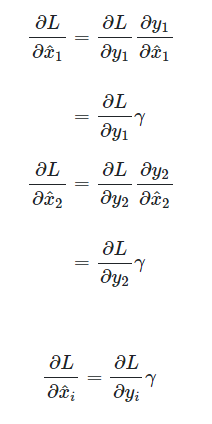

In [233]:
dxx1 = dy1 * gamma
print("\n\t#Loss'un xx1'e göre türevi:", dxx1)

dxx2 = dy2 * gamma
print("\n\t#Loss'un xx2'e göre türevi:", dxx2)



	#Loss'un xx1'e göre türevi: 6.0

	#Loss'un xx2'e göre türevi: 6.0


### Varyansa(Sigma2) göre türev

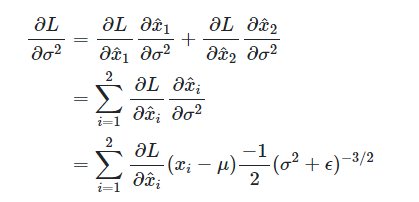

In [234]:
dxx1var = dxx1 * (x1- mu)* -0.5*(np.power(sigma2 + eps, -3/2))
dxx2var = dxx2 * (x2- mu)* -0.5*(np.power(sigma2 + eps, -3/2))
dvar = dxx1var  + dxx2var 
                    
print("\n\t#Loss'un sigma2'ye göre türevi:", dvar)


	#Loss'un sigma2'ye göre türevi: 0.0


### Mean(mu)'e göre türev

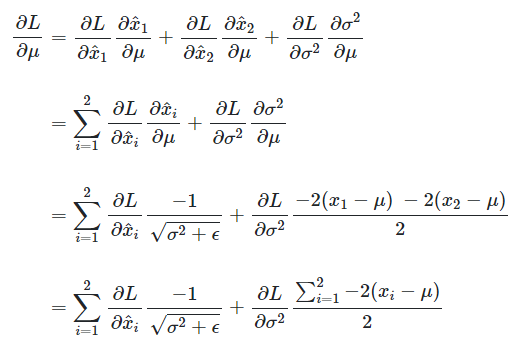

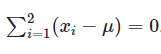

In [235]:
dmuxx1 = dxx1 * -1/(np.sqrt(sigma2 + eps))
dmuxx2 = dxx2 * -1/(np.sqrt(sigma2 + eps))

dmu = dmuxx1 + dmuxx2 + dvar*0
print("\n\t#Loss'un mu'ye göre türevi:", dmu)



	#Loss'un mu'ye göre türevi: -1.9999986111125578


### x1 ve x2' ye göre türev

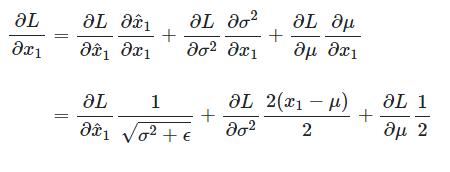

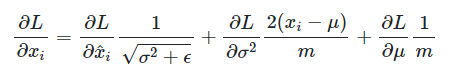

In [241]:
dx1 = dxx1 * 1/(np.sqrt(sigma2 + eps))+ dvar * (2*(x1-mu))/2  + dmu * 0.5

dx2 = dxx2 * 1/(np.sqrt(sigma2 + eps)) + dvar * (2*(x2-mu))/2 + dmu * 0.5

print("\n\t#Loss'un x1'e göre türevi:", dx1)
print("\n\t#Loss'un x2'e göre türevi:", dx2)



	#Loss'un x1'e göre türevi: 0.0

	#Loss'un x2'e göre türevi: 0.0


# Kaynaklar

1. https://www.youtube.com/watch?v=DtEq44FTPM4

2. https://paperswithcode.com/method/batch-normalization

3. https://web.cs.hacettepe.edu.tr/~aykut/classes/spring2020/cmp784/slides/lec4-training-deep-nets.pdf

4. https://www.adityaagrawal.net/blog/deep_learning/bprop_batch_norm

